In [2]:
import keras, tensorflow

In [6]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

In [24]:
img_gen = ImageDataGenerator(rescale=1.0/255)

In [5]:
path = '../data/cat_dog/train/'

In [8]:
cat = load_img(path+'cat/cat.2.jpg')

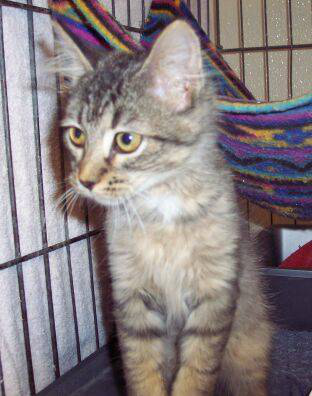

In [9]:
cat

In [10]:
type(cat)

PIL.JpegImagePlugin.JpegImageFile

In [11]:
cat_array = img_to_array(cat)

In [12]:
type(cat_array)

numpy.ndarray

In [13]:
cat_array

array([[[ 65.,  54.,  52.],
        [ 67.,  56.,  54.],
        [ 48.,  36.,  36.],
        ...,
        [147., 142., 123.],
        [132., 127., 108.],
        [110., 103.,  85.]],

       [[ 57.,  43.,  43.],
        [ 63.,  48.,  51.],
        [ 56.,  41.,  44.],
        ...,
        [176., 169., 151.],
        [143., 136., 118.],
        [ 99.,  92.,  74.]],

       [[ 89.,  72.,  78.],
        [ 78.,  61.,  69.],
        [ 54.,  37.,  45.],
        ...,
        [167., 160., 142.],
        [148., 139., 122.],
        [110., 101.,  84.]],

       ...,

       [[149., 142., 150.],
        [114., 107., 115.],
        [ 68.,  58.,  66.],
        ...,
        [ 73.,  61.,  65.],
        [169., 157., 157.],
        [212., 201., 199.]],

       [[146., 139., 146.],
        [114., 107., 114.],
        [ 70.,  60.,  68.],
        ...,
        [128., 116., 118.],
        [197., 186., 184.],
        [222., 211., 207.]],

       [[143., 136., 143.],
        [115., 108., 115.],
        [ 72.,  

In [14]:
cat_array.shape

(396, 312, 3)

In [15]:
cat2 = load_img(path+'cat/cat.10.jpg')

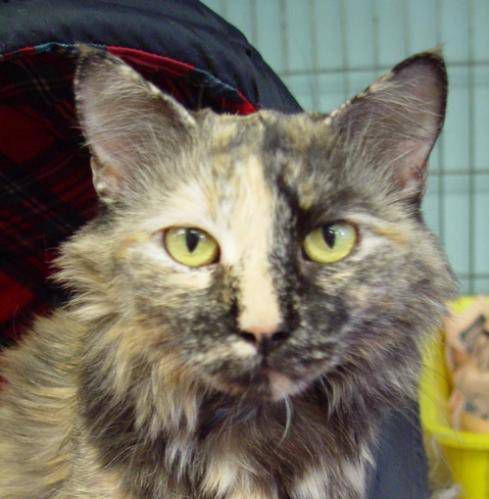

In [16]:
cat2

In [17]:
cat2_array = img_to_array(cat2)

In [18]:
cat2_array

array([[[ 26.,  30.,  39.],
        [ 24.,  28.,  37.],
        [ 19.,  23.,  32.],
        ...,
        [126., 158., 155.],
        [125., 157., 154.],
        [125., 157., 154.]],

       [[ 29.,  33.,  42.],
        [ 29.,  33.,  42.],
        [ 26.,  30.,  39.],
        ...,
        [126., 158., 155.],
        [125., 157., 154.],
        [124., 156., 153.]],

       [[ 30.,  34.,  43.],
        [ 34.,  38.,  47.],
        [ 35.,  39.,  48.],
        ...,
        [127., 159., 156.],
        [126., 158., 155.],
        [124., 156., 153.]],

       ...,

       [[165., 151., 116.],
        [163., 149., 114.],
        [156., 142., 105.],
        ...,
        [175., 171.,   2.],
        [172., 167.,   3.],
        [166., 161.,   0.]],

       [[160., 146., 111.],
        [159., 145., 110.],
        [153., 139., 102.],
        ...,
        [175., 171.,   2.],
        [172., 167.,   3.],
        [166., 161.,   0.]],

       [[154., 140., 105.],
        [154., 140., 105.],
        [150., 1

In [20]:
cat2_array.shape

(499, 489, 3)

In [25]:
train_gen = img_gen.flow_from_directory(path, target_size=(32, 32), class_mode='binary', batch_size=1000)

Found 11000 images belonging to 2 classes.


In [26]:
for data in train_gen:
    print(data)
    print(type(data))
    print(data[0].shape)
    break

(array([[[[0.14901961, 0.14509805, 0.20784315],
         [0.15686275, 0.15294118, 0.21568629],
         [0.13333334, 0.14117648, 0.20000002],
         ...,
         [0.32156864, 0.4039216 , 0.4156863 ],
         [0.3254902 , 0.40784317, 0.41176474],
         [0.29803923, 0.3803922 , 0.40000004]],

        [[0.16078432, 0.15686275, 0.21960786],
         [0.15686275, 0.15294118, 0.21568629],
         [0.12156864, 0.14509805, 0.20000002],
         ...,
         [0.32941177, 0.41176474, 0.42352945],
         [0.30980393, 0.41176474, 0.40784317],
         [0.34509805, 0.4431373 , 0.45882356]],

        [[0.16078432, 0.15686275, 0.21960786],
         [0.16078432, 0.15686275, 0.21960786],
         [0.14901961, 0.18823531, 0.23529413],
         ...,
         [0.42352945, 0.5058824 , 0.5176471 ],
         [0.38431376, 0.49803925, 0.4901961 ],
         [0.31764707, 0.427451  , 0.43921572]],

        ...,

        [[0.56078434, 0.6666667 , 0.6       ],
         [0.49411768, 0.56078434, 0.52156866

In [27]:
#validation image generator
val_gen = img_gen.flow_from_directory('../data/cat_dog/validation/', (32, 32), class_mode='binary', batch_size=500)

Found 2000 images belonging to 2 classes.


In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [29]:
model = Sequential()

In [30]:
#zero padding
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3, )))

In [31]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [32]:
model.add(MaxPool2D(2,2))

In [33]:
model.add(Dropout(0.2))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

In [36]:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [40]:
model.add(Flatten())

In [41]:
#2 hidden layers
model.add(Dense(200, activation='relu', ))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', ))
model.add(Dropout(0.2))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [44]:
#output
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
#no batch size because of val_gen
model.fit_generator(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
11/11 [==============================] - 116s 11s/step - loss: 0.3967 - acc: 0.8428 - val_loss: 1.0802 - val_acc: 0.5000
Epoch 2/10
11/11 [==============================] - 99s 9s/step - loss: 0.3134 - acc: 0.9091 - val_loss: 1.0737 - val_acc: 0.5000
Epoch 3/10
11/11 [==============================] - 89s 8s/step - loss: 0.3073 - acc: 0.9091 - val_loss: 1.0134 - val_acc: 0.5000
Epoch 4/10
11/11 [==============================] - 90s 8s/step - loss: 0.3021 - acc: 0.9091 - val_loss: 1.0661 - val_acc: 0.5000
Epoch 5/10
11/11 [==============================] - 84s 8s/step - loss: 0.3003 - acc: 0.9091 - val_loss: 0.9692 - val_acc: 0.5000
Epoch 6/10
11/11 [==============================] - 90s 8s/step - loss: 0.3004 - acc: 0.9091 - val_loss: 1.1120 - val_acc: 0.5000
Epoch 7/10
11/11 [==============================] - 94s 9s/step - loss: 0.3003 - acc: 0.9091 - val_loss: 0.9347 - val_acc: 0.5000
Epoch 8/10
11/11 [==============================] - 101s 9s/step - loss: 0.2960 - acc: 0

In [48]:
#gen test data 
aug_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, brightness_range=[1, 2], zoom_range=0.2, shear_range=20)

In [49]:
import os

In [50]:
save_path = "../data/cat_dog/new_cat"

if not os.path.exists(save_path):
    os.mkdir(save_path)

In [51]:
cat_gen = aug_gen.flow_from_directory(path, batch_size=1000, save_prefix='cat', save_format='jpeg', save_to_dir=save_path)

Found 1000 images belonging to 1 classes.


In [52]:
n =0

for _ in cat_gen:
    n += 1
    
    if n > 9:
        break

In [56]:
train_gen = img_gen.flow_from_directory(path, target_size=(32, 32), class_mode='binary', batch_size=1000)

Found 21000 images belonging to 2 classes.


In [57]:
model.reset_states()

In [ ]:
model.fit_generator(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
21/21 [==============================] - 178s 8s/step - loss: 0.7355 - acc: 0.5002 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 2/10
21/21 [==============================] - 155s 7s/step - loss: 0.6722 - acc: 0.5290 - val_loss: 0.6922 - val_acc: 0.5180
Epoch 3/10
21/21 [==============================] - 154s 7s/step - loss: 0.6232 - acc: 0.6583 - val_loss: 0.6925 - val_acc: 0.5185
Epoch 4/10
21/21 [==============================] - 157s 7s/step - loss: 0.5552 - acc: 0.7411 - val_loss: 0.7408 - val_acc: 0.5330
Epoch 5/10
20/21 [===========================>..] - ETA: 6s - loss: 0.5125 - acc: 0.7524 